# Lecture 20: Intro to Nerual Netwroks

Plan:
1. Set up imports
2. Load CIFAR-10 images using pickle
3. Write a function to view an image
4. train/test split
5. Model fitting
6. Accuracy evalution
7. Investigate how hidden layer archetecture affects accuracy
8. Activity: Investigate how activation function affects accuracy


In [2]:
# set up imports
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [7]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [4]:
# gt image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

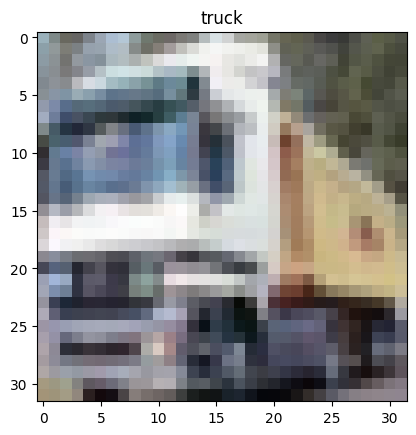

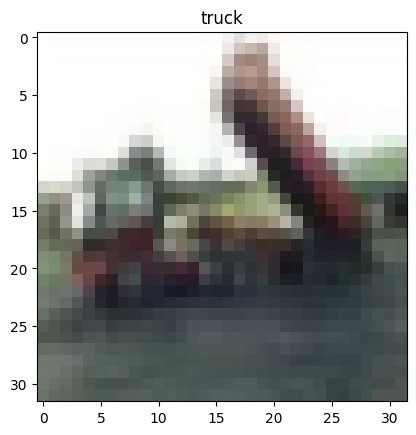

In [6]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# display first image
#image = image_data[0]
#label = label_data[0]

def show_image(image, label):

    # reshape image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    #reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

#print(label_data[0])
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [8]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

In [10]:
#define our model
clf = MLPClassifier(random_state=42)

#Train the model

clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [11]:
# make predictions
y_pred = clf.predict(X_test)

#determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.094

In [ ]:
# investigate how hidden layer affect accuracy
hidden_layer_sizes = [
    (50,),
    (100,),
    (1000,),
    (100,100),
    (100, 100, 100),
]

accuracy_score_list = []

#loop over hidden layer shapes, train model and record accuracy
for hidden_layer_size in hidden_layer_sizes:
    print(hidden_layer_size)
    #define the  model
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, random_state=42)

    #train the model
    clf.fit(X_train, y_train)

    #make predictions
    y_pred = clf.predict(X_test)

    #evaluate modle and save accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_score_list.append(accuracy)


accuracy_score_list

(50,)
(100,)
(1000,)
(100, 100)
(100, 100, 100)


[0.094, 0.094, 0.1044, 0.3308, 0.3728]

Text(0.5, 1.0, 'Effect of Hidden Layer Shape on NN Accuracy')

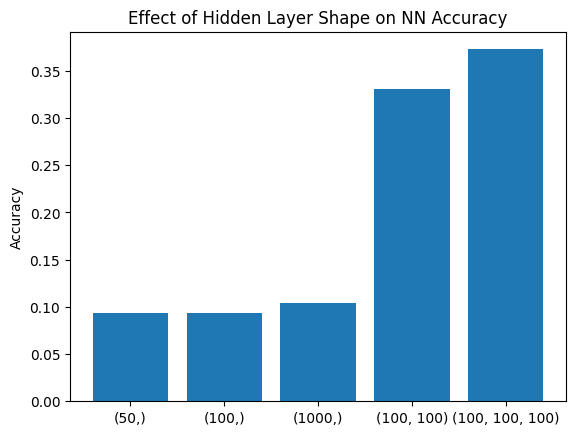

In [24]:

labels = [str(shape) for shape in hidden_layer_sizes]
labels

plt.bar(labels, accuracy_score_list)
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Shape on NN Accuracy')

In [26]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

#make a blank list to sort accuracy scores
accuracy_score_list_act = []
#loop over activation functions
for act_function in activation_functions:
    print(act_function)
    clf = MLPClassifier(activation=act_function,hidden_layer_sizes=(100, 100, 100), random_state=42)

    #train the model
    clf.fit(X_train, y_train)

    #make predictions
    y_pred = clf.predict(X_test)

    #evaluate modle and save accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_score_list_act.append(acc)

#define, train, evaluate model with given activation function, 

# store acccuracy in the list

#generate a bar graph

identity
logistic
tanh
relu


In [27]:
accuracy_score_list_act

[0.324, 0.1012, 0.0976, 0.3728]

Text(0.5, 1.0, 'Effect of activation on NN Accuracy')

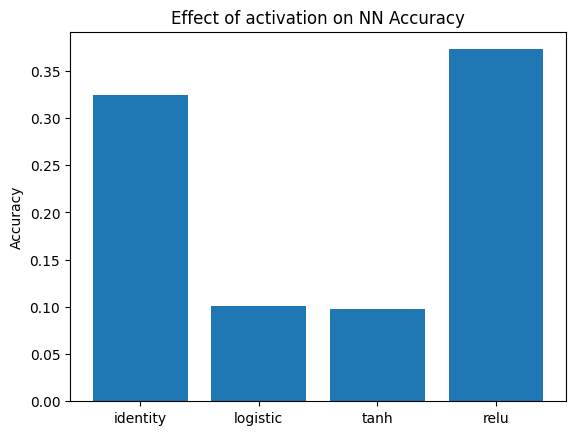

In [28]:
labels = [str(shape) for shape in activation_functions]
labels

plt.bar(labels, accuracy_score_list_act)
plt.ylabel('Accuracy')
plt.title('Effect of activation on NN Accuracy')